# 비지도 학습과 데이터 전처리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 3.3 데이터 전처리와 스케일 조정

## 공통

In [1]:
# %config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## 데이터 전처리와 스케일링

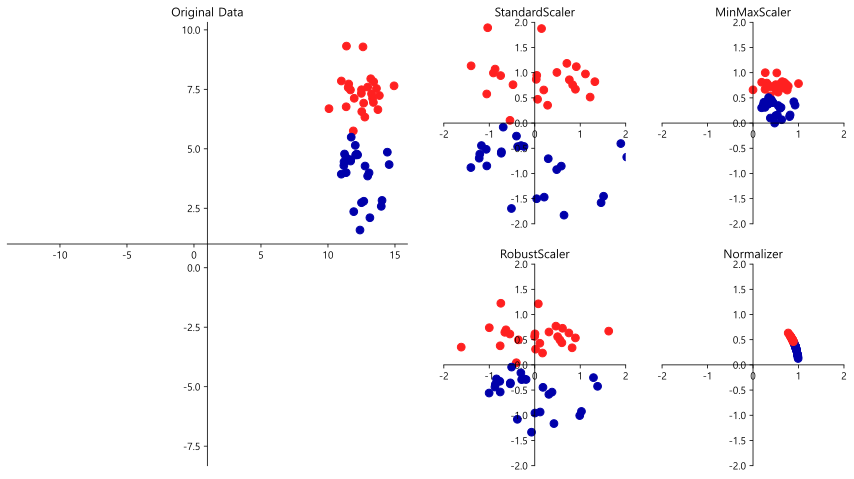

In [3]:
mglearn.plots.plot_scaling()

### 데이터 준비

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### TRANS-Q1. MinMaxScaler
- TRANS-Q1(a). 학습 데이터를 MinMaxScaler로 변환하고 최소값과 최대값을 출력하세요.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)     #min, max 값을 가져옴
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.39 , 0.707, 0.412, ..., 0.81 , 0.6  , 0.918],
       [0.378, 0.318, 0.368, ..., 0.512, 0.332, 0.316],
       [0.364, 0.352, 0.352, ..., 0.553, 0.348, 0.289],
       ...,
       [0.484, 0.501, 0.487, ..., 0.653, 0.415, 0.843],
       [0.334, 0.39 , 0.318, ..., 0.274, 0.157, 0.224],
       [0.286, 0.295, 0.268, ..., 0.172, 0.1  , 0.069]])

- TRANS-Q1(b). 테스트 데이터를 MinMaxScaler로 변환하고 최소값과 최대값을 출력하세요.

In [7]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.min(axis=0),X_test_scaled.max(axis=0))

[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002] [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

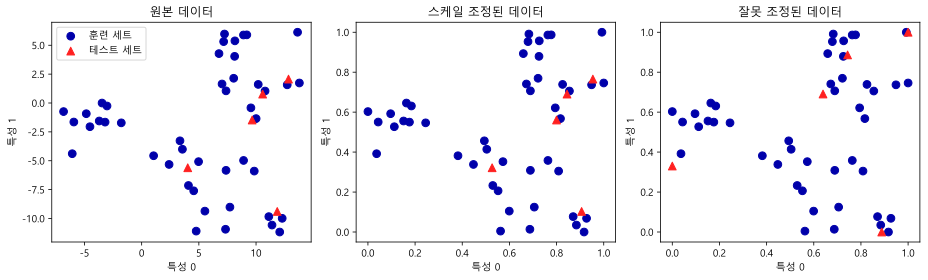

In [8]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

### TRANS-Q2. StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train).transform(X_train)
X_train_scaled

array([[ 1.265,  0.723],
       [-1.904,  0.105],
       [ 0.488,  1.454],
       [ 1.19 , -1.495],
       [ 0.775, -0.711],
       [-1.44 ,  0.103],
       [-0.328, -0.208],
       [-1.664,  0.027],
       [ 0.348, -1.677],
       [ 0.333,  1.567],
       [-1.527,  0.122],
       [-0.719, -0.455],
       [ 0.991, -1.467],
       [ 0.356, -0.698],
       [ 1.445,  0.753],
       [-0.052, -0.554],
       [-0.202, -0.95 ],
       [ 0.042, -1.376],
       [ 0.47 ,  0.832],
       [ 0.834,  0.73 ],
       [ 1.153, -1.723],
       [-1.719,  0.243],
       [ 0.484,  1.196],
       [-1.199,  0.091],
       [ 0.616, -0.534],
       [ 0.665,  1.553],
       [-2.056,  0.278],
       [-1.411,  0.371],
       [ 0.935,  0.62 ],
       [ 0.297,  0.737],
       [ 0.615,  1.551],
       [ 0.356,  0.623],
       [-1.485,  0.42 ],
       [-1.927, -0.422],
       [-0.292, -0.348],
       [-0.087, -1.708],
       [ 0.32 ,  1.441],
       [ 1.418,  1.596],
       [ 0.251,  1.242],
       [-0.489, -0.6  ],


### TRANS-Q3. 지도 학습에서 데이터 전처리 효과

In [11]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

svm = SVC(gamma="auto")
svm.fit(X_train, y_train)
svm.score(X_test,y_test)

0.6153846153846154

- TRANS-Q3(a). 학습 데이터를 Min/Max 스케일로 조정하고 정확도를 출력하세요.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_train).transform(X_test)

svm.fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.9440559440559441

- TRANS-Q3(b). 학습 데이터를 StandardScaler로 변환하고 정확도를 출력하세요.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_train).transform(X_test)

svm.fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.965034965034965